In [1]:
import pandas
import numpy as np
import uproot
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportion_confint
import gc
import seaborn as sns

In [2]:
def ReadBrancesToDataFrame(file_name, tree_name, branches, nentries=None):
    with uproot.open(file_name) as file:
        tree = file[tree_name]
        df = tree.arrays(branches, entrystop=nentries, outputtype=pandas.DataFrame)
        df.columns = [ c.decode('utf-8') for c in df.columns ]
    return df

In [7]:
def VectorizeGenMatch(data):
    e = (data["gen_match"] == 1) | (data["gen_match"] == 3)
    data['gen_e'] = pandas.Series(e.astype(int), data.index)
    mu = (data["gen_match"] == 2) | (data["gen_match"] == 4)
    data['gen_mu'] = pandas.Series(mu.astype(int), data.index)
    tau = data["gen_match"] == 5
    data['gen_tau'] = pandas.Series(tau.astype(int), data.index)
    jet = data["gen_match"] == 6
    data['gen_jet'] = pandas.Series(jet.astype(int), data.index)

In [3]:
df = ReadBrancesToDataFrame('../../tuples/mixed_training/shuffled.root', 'taus', ['gen_match', 'pt'])

In [8]:
VectorizeGenMatch(df)

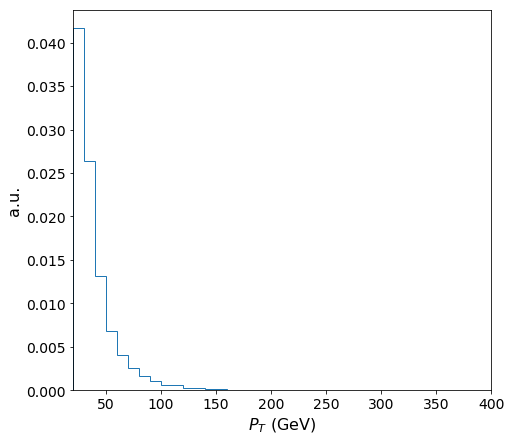

In [12]:
pt = np.array([20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300, 350, 400])
bins = pt
fig = plt.figure(figsize=(7.5,7))
plt.hist(df[(df['gen_tau'] == 1)]['pt'], bins=bins, histtype='step', stacked=True, fill=False, density=True)
plt.xlim([bins[0], bins[-1]])
plt.xlabel('$P_T$ (GeV)', fontsize=16)
plt.ylabel('a.u.', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('DY_tau_pt.pdf', bbox_inches='tight')